# Exploratory Analysis on which cities has the most volatile markets
### Andrew's File

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

# Custom Scripts
import project1scripts as custom

warnings.filterwarnings('ignore')

In [2]:
# Loading cleaned dataframe
df = pd.read_csv('clean_median_sale_price_v2_df.csv')

# Data Cleaning
# Convert values to Numeric
# df = df.fillna(0)
# for column in df.columns[2:]:
#     df[column] = df[column].str.replace(",", "")
#     df[column] = df[column].str.replace(".", "")
#     df[column] = pd.to_numeric(df[column])

# Pushed cleaned file on commit 616a2d9d01a7a68f58a90dd7b8d92b0e312a381"
# df.to_csv('clean_median_sale_price_v2_df.csv')
# df.info()

df.head()

,RegionName,StateName,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,...,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23
0,"New York, NY",NY,39866700,39866700,40166700,40800000,41466700,41300000,40166700,38708000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,49833300,49500000,49033300,48033300,46700000,45266700,44100000,42600000,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,23083300,23333300,23666700,24166700,24366700,23658300,22991700,22125000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,14256300,14686300,14963300,15280000,15283300,14783300,14333300,13798300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14357500,14527500,14927500,15233300,15333300,15163300,14473300,13674200,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [3]:
ne_df, se_df, mw_df, w_df, sw_df = custom.split_regions(df)
ne_df.head()

,RegionName,StateName,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,...,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23
0,"New York, NY",NY,39866700,39866700,40166700,40800000,41466700,41300000,40166700,38708000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
6,"Philadelphia, PA",PA,20882300,21449000,22033300,22733300,23083300,22633300,21933300,21016700,...,32113300,31613300,31246700,30800000,30300000,30500000,31066700,32233300,33733300,35000000
9,"Boston, MA",MA,32241700,33385700,34449100,35140700,35330000,33833300,32500000,31166700,...,60666700,59666700,58633300,57666700,56000000,57141700,59391700,62741700,65266700,67016700
26,"Pittsburgh, PA",PA,11673300,11953300,12205000,12521700,12475000,12066700,11656700,11456700,...,21300000,20633300,20000000,19166700,18833300,19163300,20063300,21063300,22366700,23233400
37,"Providence, RI",RI,24662900,24662900,24996300,24966700,24700000,24033300,23400000,22833300,...,39966700,39850000,39183300,38716700,38183300,38183300,38850000,40050000,41716700,42716700


In [4]:
# Convert entire df to percent changes
# pct_df = df.iloc[:, 4:].pct_change(axis=1)
# pct_df = pct_df.drop("4/30/2008", axis=1)
# new_york = pct_df.iloc[1,2:]

# Capture city names
ne_cities = ne_df['RegionName']
se_cities = se_df['RegionName']
mw_cities = mw_df['RegionName']
w_cities = w_df['RegionName']
sw_cities = sw_df['RegionName']

# Calculate pct_changes
df_ne_pct = ne_df.iloc[:, 2:].pct_change(axis=1)
df_se_pct = se_df.iloc[:, 2:].pct_change(axis=1)
df_mw_pct = mw_df.iloc[:, 2:].pct_change(axis=1)
df_w_pct = w_df.iloc[:, 2:].pct_change(axis=1)
df_sw_pct = sw_df.iloc[:, 2:].pct_change(axis=1)

# Concat cities and drop empty column
df_ne_pct = pd.concat([ne_cities, df_ne_pct], axis=1).drop("4/30/08", axis=1)
df_se_pct = pd.concat([se_cities, df_se_pct], axis=1).drop("4/30/08", axis=1)
df_mw_pct = pd.concat([mw_cities, df_mw_pct], axis=1).drop("4/30/08", axis=1)
df_w_pct = pd.concat([w_cities, df_w_pct], axis=1).drop("4/30/08", axis=1)
df_sw_pct = pd.concat([sw_cities, df_sw_pct], axis=1).drop("4/30/08", axis=1)

In [5]:
df_ne_pct.head()

,RegionName,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,...,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23
0,"New York, NY",0.000000,0.007525,0.015767,0.016341,-0.004020,-0.027441,-0.036316,-0.021745,-0.017403,...,-0.029442,-0.027607,-0.018927,-0.005788,-0.011319,0.001635,0.012412,0.037095,0.041991,0.038210
6,"Philadelphia, PA",0.027138,0.027241,0.031770,0.015396,-0.019495,-0.030928,-0.041790,-0.024585,-0.021137,...,-0.021929,-0.015570,-0.011596,-0.014296,-0.016234,0.006601,0.018580,0.037551,0.046536,0.037550
9,"Boston, MA",0.035482,0.031852,0.020076,0.005387,-0.042363,-0.039408,-0.041025,-0.016043,-0.006522,...,-0.032429,-0.016484,-0.017320,-0.016486,-0.028902,0.020388,0.039376,0.056405,0.040244,0.026813
26,"Pittsburgh, PA",0.023986,0.021057,0.025948,-0.003730,-0.032729,-0.033978,-0.017158,-0.023279,-0.014004,...,-0.026286,-0.031300,-0.030693,-0.041665,-0.017395,0.017522,0.046965,0.049842,0.061880,0.038750
37,"Providence, RI",0.000000,0.013518,-0.001184,-0.010682,-0.026992,-0.026351,-0.024218,-0.022625,-0.041825,...,-0.004979,-0.002920,-0.016730,-0.011908,-0.013777,0.000000,0.017461,0.030888,0.041615,0.023971


In [6]:
# Exporting to files

# pct_df.to_csv("pct-files/percent_changes.csv")

# df_ne_pct.to_csv('pct-files/NE-percentages.csv', index=False)
# df_se_pct.to_csv('pct-files/SE-percentages.csv', index=False)
# df_mw_pct.to_csv('pct-files/MW-percentages.csv', index=False)
# df_w_pct.to_csv('pct-files/W-percentages.csv', index=False)
# df_sw_pct.to_csv('pct-files/SW-percentages.csv', index=False)

<Axes: >

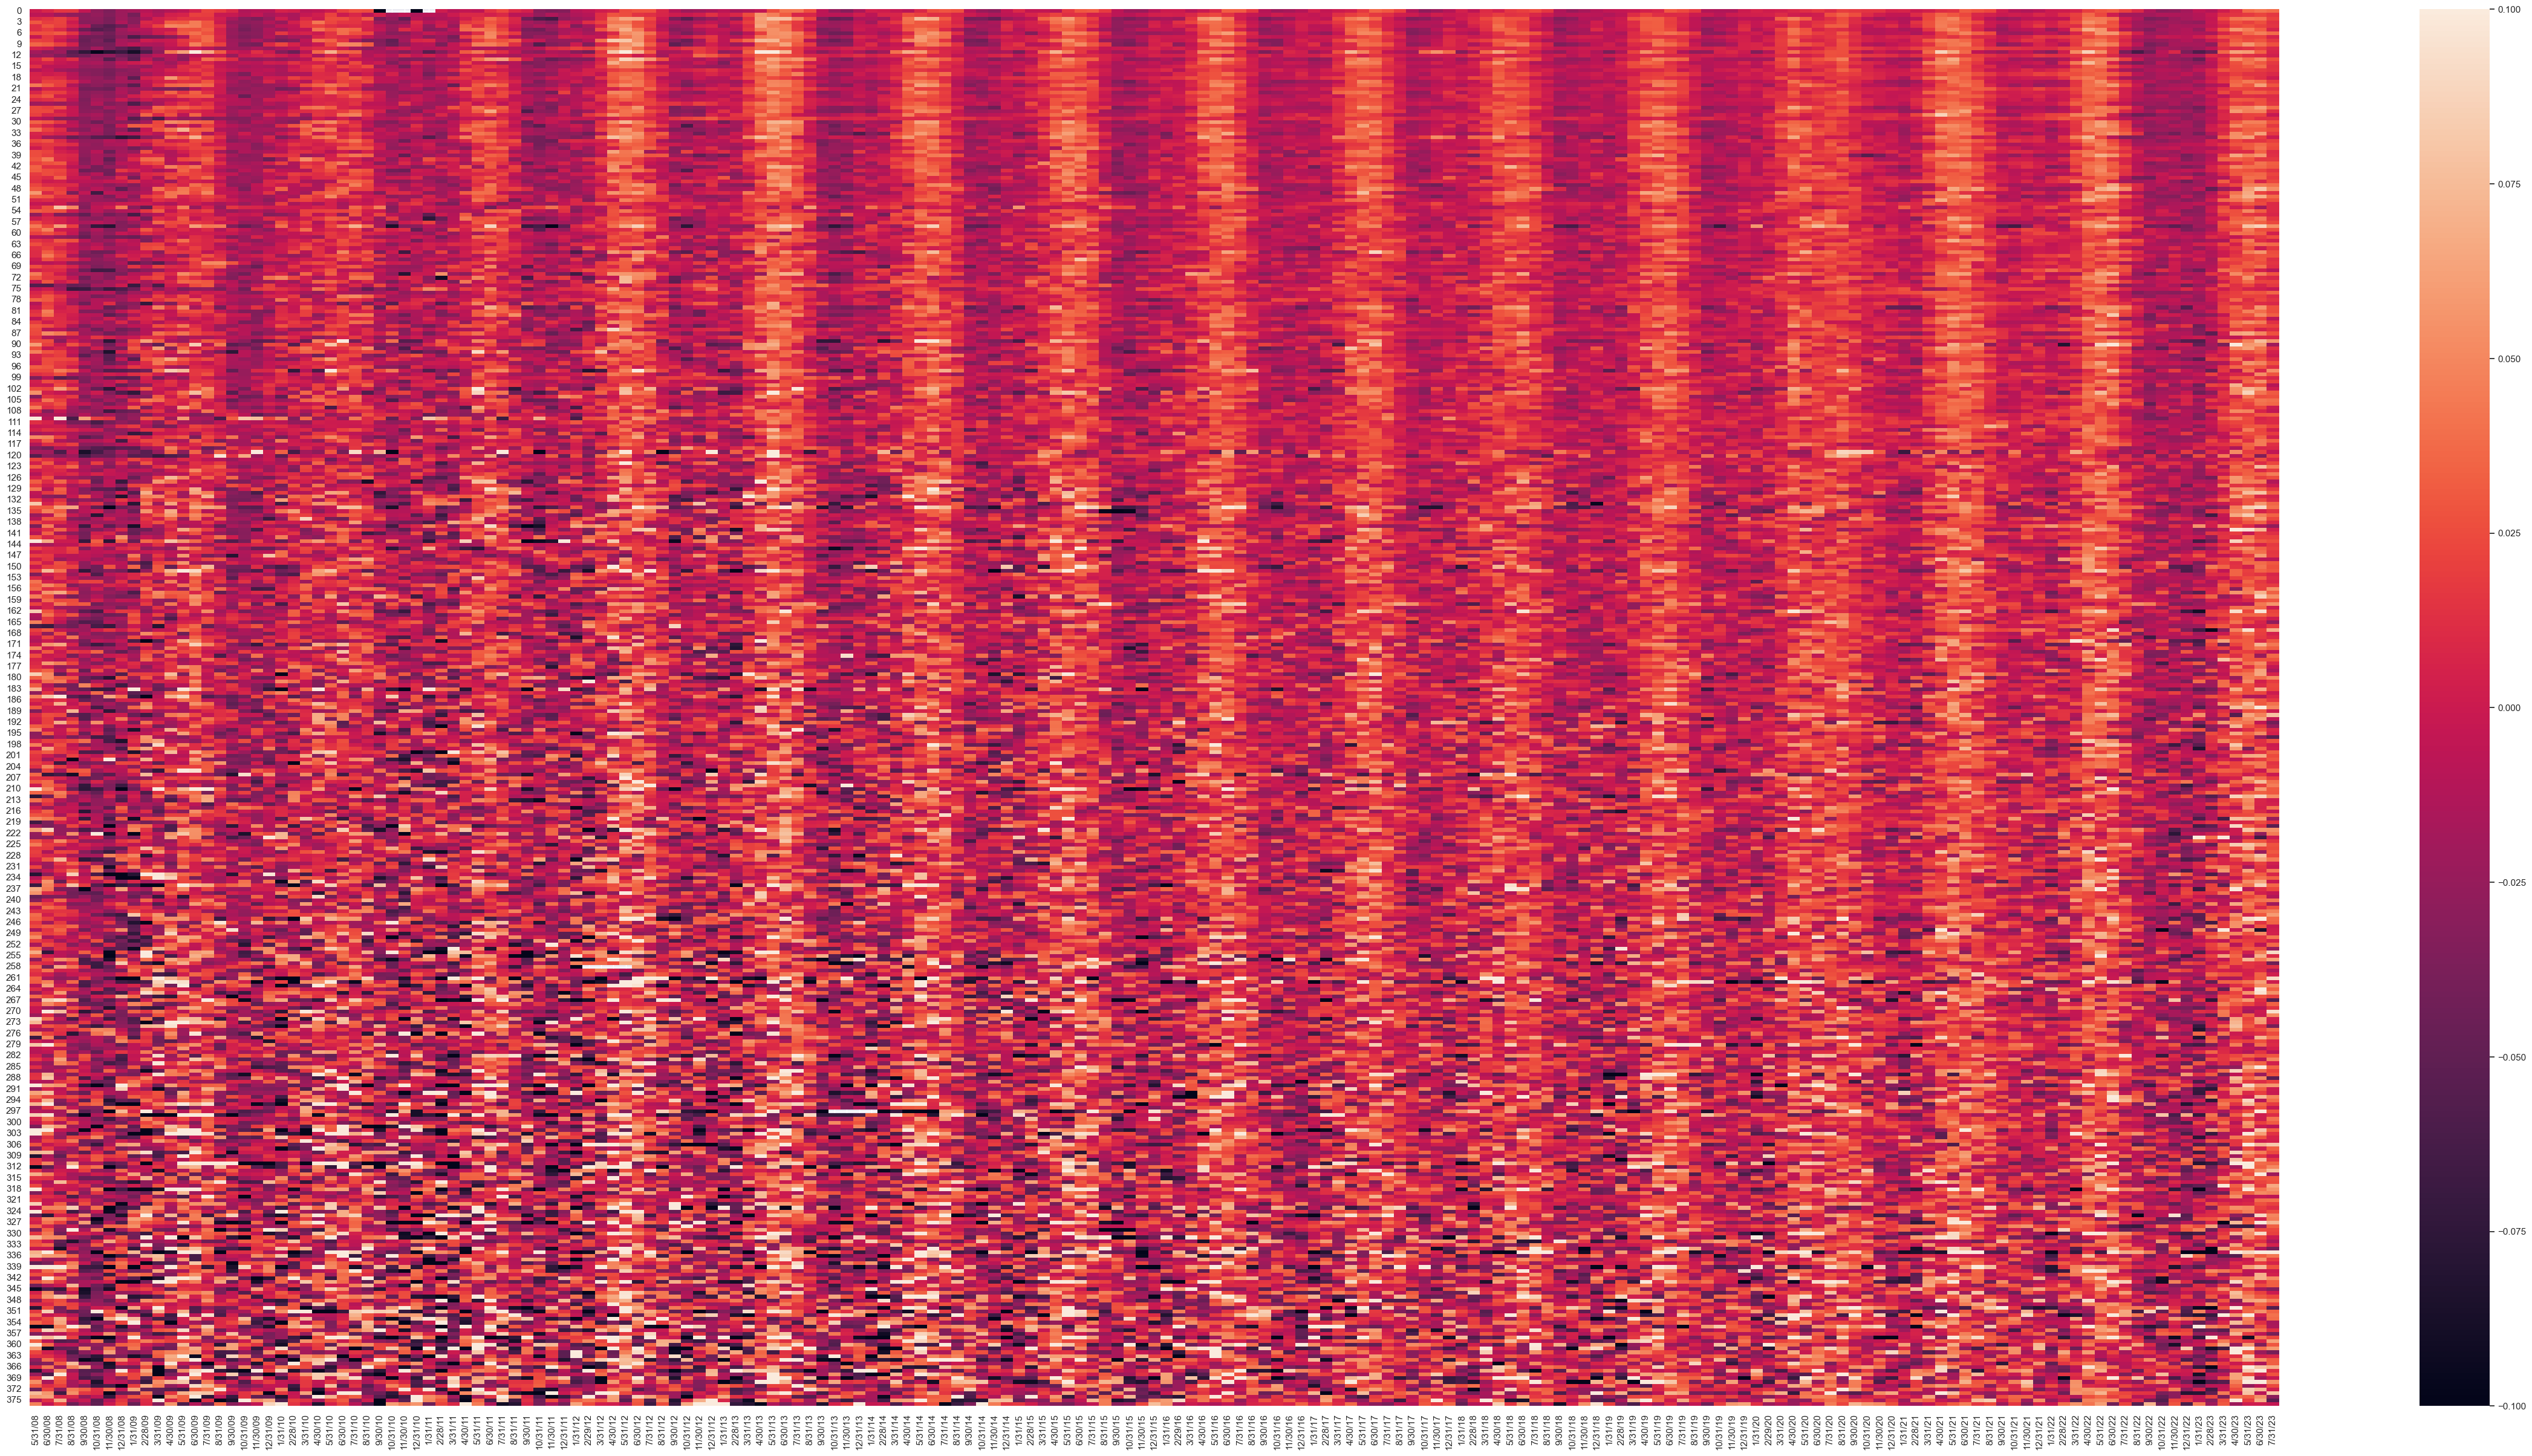

In [7]:
# Draw a heatmap with the numeric values in each cell
df_pct = pd.read_csv("pct-files/percent_changes.csv")
sns.set_theme()
f, ax = plt.subplots(figsize=(60, 30))
sns.heatmap(df_pct, fmt="d", linewidths=0, ax=ax)

In [8]:
# Transpose table so observations are on the rows
df_cities = pd.read_csv('cities_index.csv')
df_ne_pct.head()
df_cities_pct_pivot = df_pct.transpose()
df_cities_pct_pivot.columns = df_cities['RegionName']
df_cities_pct_pivot.head()

df_ne_pct = df_ne_pct.reset_index(drop=True).set_index('RegionName').transpose()
df_se_pct = df_se_pct.reset_index(drop=True).set_index('RegionName').transpose()
df_mw_pct = df_mw_pct.reset_index(drop=True).set_index('RegionName').transpose()
df_w_pct = df_w_pct.reset_index(drop=True).set_index('RegionName').transpose()
df_sw_pct = df_sw_pct.reset_index(drop=True).set_index('RegionName').transpose()

In [9]:
df_ne_pct.head()

RegionName,"New York, NY","Philadelphia, PA","Boston, MA","Pittsburgh, PA","Providence, RI","Hartford, CT","Buffalo, NY","Rochester, NY","Worcester, MA","Bridgeport, CT",...,"Altoona, PA","Watertown, NY","Gettysburg, PA","Ocean City, NJ","Corning, NY","Sunbury, PA","New Castle, PA","Plattsburgh, NY","Olean, NY","Laconia, NH"
5/31/08,0.000000,0.027138,0.035482,0.023986,0.000000,0.022355,0.030188,0.032937,0.000000,0.043834,...,0.012957,0.039957,0.014700,0.023464,-0.002852,0.069516,0.131590,-0.030003,0.038955,0.006211
6/30/08,0.007525,0.027241,0.031852,0.021057,0.013518,0.010203,0.026463,0.028983,0.007970,0.023437,...,0.071949,0.020521,0.013216,0.000745,-0.003821,0.124218,0.161664,0.016656,-0.003321,0.043210
7/31/08,0.015767,0.031770,0.020076,0.025948,-0.001184,0.010100,0.018906,0.012769,0.005034,0.061067,...,-0.018068,0.016684,-0.003763,-0.050450,-0.088031,0.032621,0.104104,0.025632,0.003982,-0.020511
8/31/08,0.016341,0.015396,0.005387,-0.003730,-0.010682,0.010714,0.000700,0.012516,-0.003575,0.019569,...,-0.033337,0.025401,-0.016784,-0.082049,-0.000214,-0.043548,0.054210,-0.018298,-0.008806,0.048329
9/30/08,-0.004020,-0.019495,-0.042363,-0.032729,-0.026992,-0.014133,-0.019663,-0.020603,-0.027997,-0.033165,...,0.001571,0.010098,-0.045060,-0.047347,-0.033589,-0.027110,-0.067965,-0.037970,-0.046474,0.067611


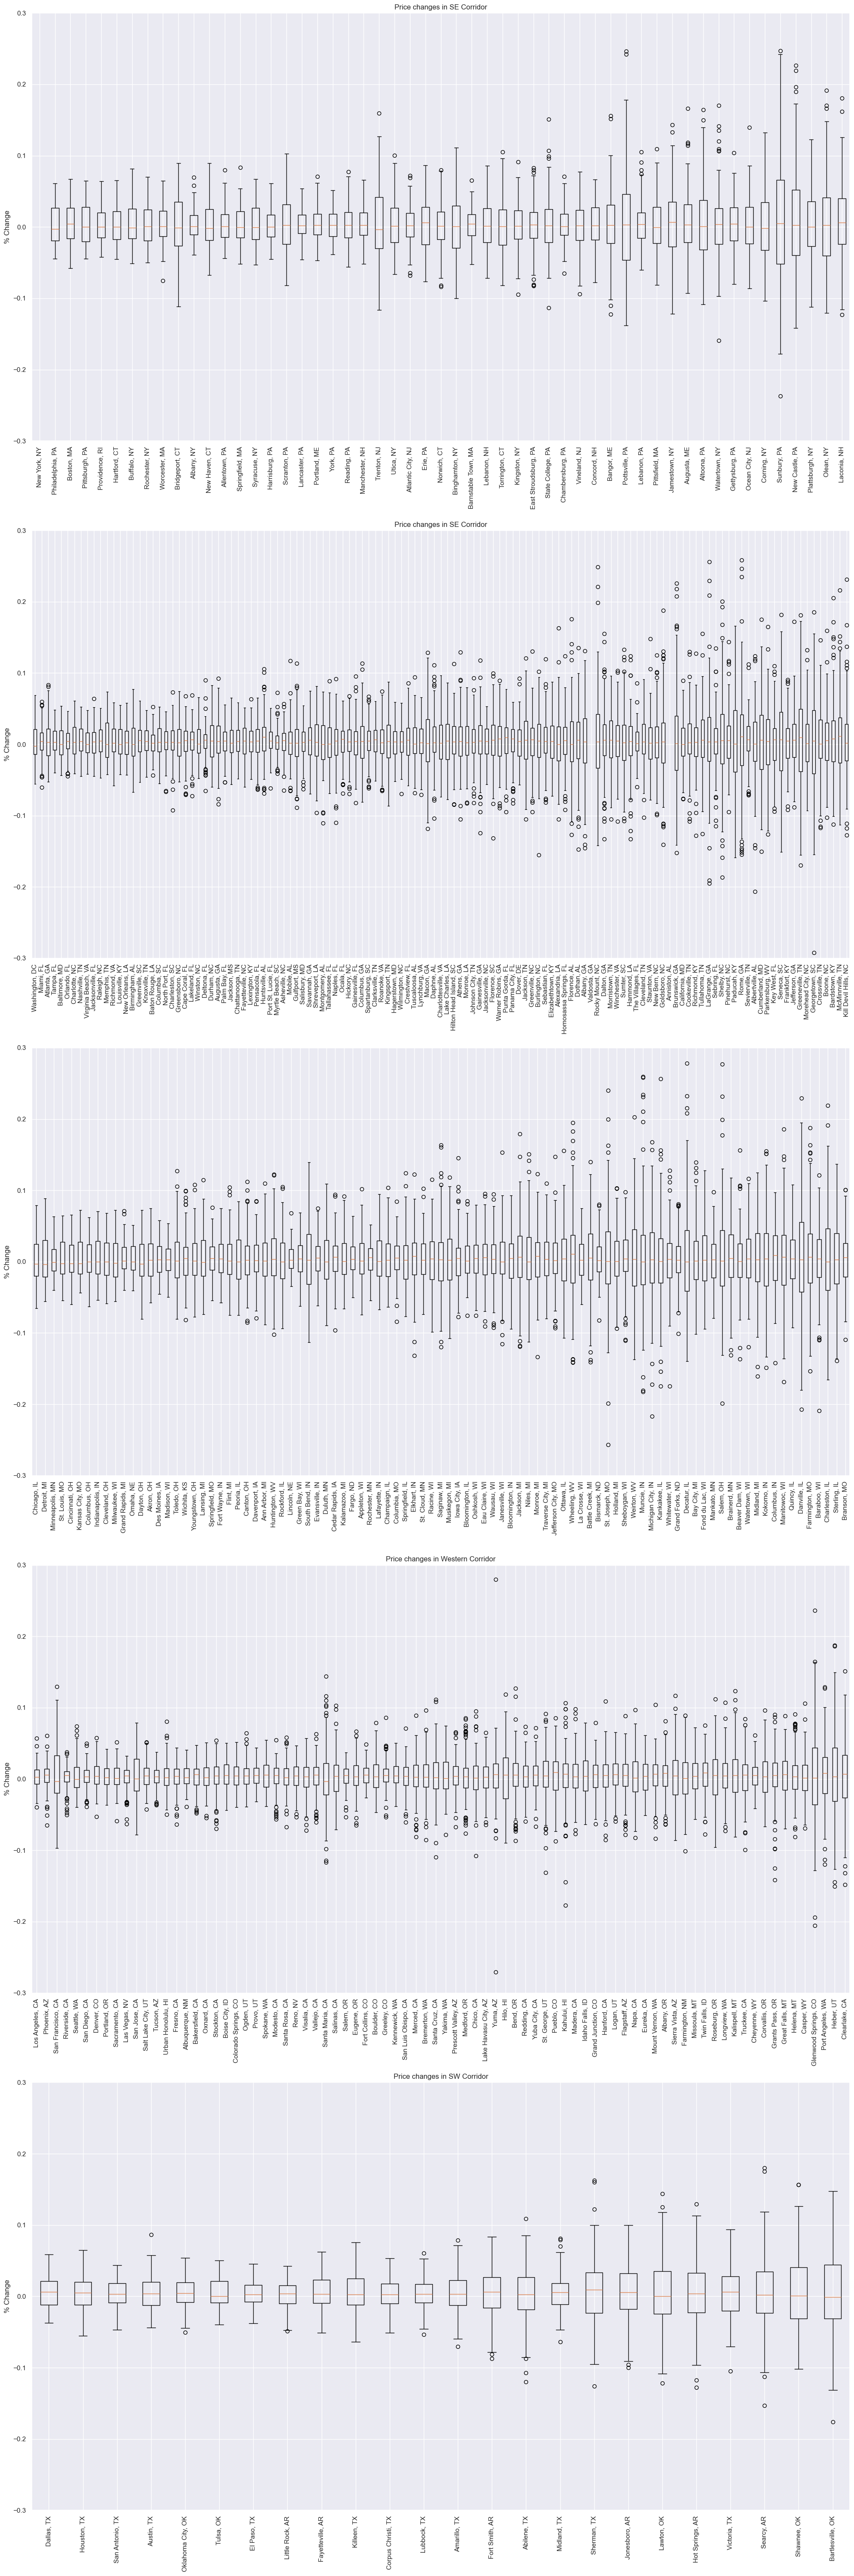

In [11]:
# Plotting NE sector
fig1, ax1 = plt.subplots(5,1, figsize=(20,60))
ax1[0].boxplot(df_ne_pct)
ax1[0].set_xticklabels(df_ne_pct.columns, rotation=90)
ax1[0].set_ylim(-0.3, 0.3)
ax1[0].set_ylabel("% Change")
ax1[0].set_title("Price changes in SE Corridor")
ax1[1].boxplot(df_se_pct)
ax1[1].set_xticklabels(df_se_pct.columns, rotation=90)
ax1[1].set_ylim(-0.3, 0.3)
ax1[1].set_ylabel("% Change")
ax1[1].set_title("Price changes in SE Corridor")
ax1[2].boxplot(df_mw_pct)
ax1[2].set_xticklabels(df_mw_pct.columns, rotation=90)
ax1[2].set_ylim(-0.3, 0.3)
ax1[2].set_ylabel("% Change")
ax1[3].set_title("Price changes in MW Corridor")
ax1[3].boxplot(df_w_pct)
ax1[3].set_xticklabels(df_w_pct.columns, rotation=90)
ax1[3].set_ylim(-0.3, 0.3)
ax1[3].set_ylabel("% Change")
ax1[3].set_title("Price changes in Western Corridor")
ax1[4].boxplot(df_sw_pct)
ax1[4].set_xticklabels(df_sw_pct.columns, rotation=90)
ax1[4].set_ylim(-0.3, 0.3)
ax1[4].set_ylabel("% Change")
ax1[4].set_title("Price changes in SW Corridor")
plt.tight_layout()
plt.show()

<Axes: xlabel='RegionName'>

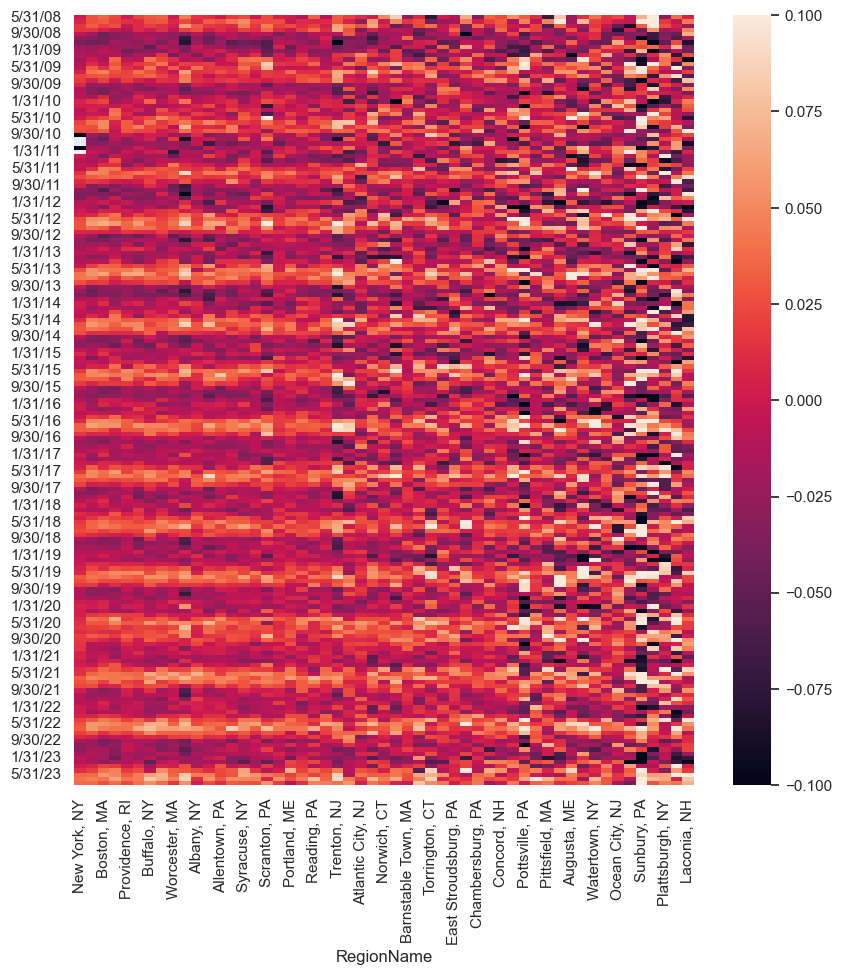

In [12]:
# Draw a heatmap with the numeric values in each cell
sns.set_theme()
f2, ax2 = plt.subplots(figsize=(10, 10))
sns.heatmap(df_ne_pct, fmt="d", linewidths=0, ax=ax2)

In [22]:
df_cities_pct_pivot['New York, NY'].dtypes

dtype('float64')

In [21]:
# Generate table of variance:
cities_variance = {}
for city in df_cities_pct_pivot.columns:
    if df_cities_pct_pivot[city].dtype != "object":  # Check if the column is numeric
        city_variance = np.var(df_cities_pct_pivot[city])
        cities_variance[city] = city_variance
# print(cities_variance)

new_york_var = np.var(df_cities_pct_pivot["New York, NY"])
new_york_var
# df_cities_pct_pivot['New York, NY'] = df_cities_pct_pivot['New York, NY'].fillna(df_cities_pct_pivot['New York, NY'].mean())
df_cities_pct_pivot['New York, NY'].describe()

count    183.000000
mean            inf
std             NaN
min       -1.000000
25%       -0.010052
50%        0.001635
75%        0.016798
max             inf
Name: New York, NY, dtype: float64